In [1]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
import pandas as pd
from mrich import print
import mrich
import molparse as mp
import hippo
import plotly.express as px
from hippo.plotting import plot_compound_tsnee, plot_compound_availability_venn

In [19]:
animal = hippo.HIPPO("2A_Precursor_FFF", "../../BulkDock/TARGETS/A71EV2AZ/A71EV2AZ.sqlite")

 Creating HIPPO animal

name = 2A_Precursor_FFF

db_path = ../../BulkDock/TARGETS/A71EV2AZ/A71EV2AZ.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = ../../BulkDock/TARGETS/A71EV2AZ/A71EV2AZ.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ ../../BulkDock/TARGETS/A71EV2AZ/A71EV2AZ.sqlite!

 Success  Initialised animal HIPPO("2A_Precursor_FFF")!

## Elab statistics

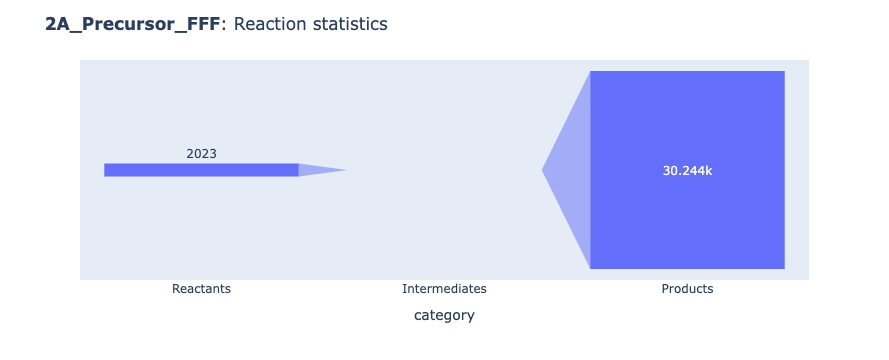

In [20]:
animal.plot_reaction_funnel(logo=False)

In [8]:
# animal.products.bases.add_tag("iter1 scaffolds")

Tagged {C × 11} w/ "iter1 scaffolds"

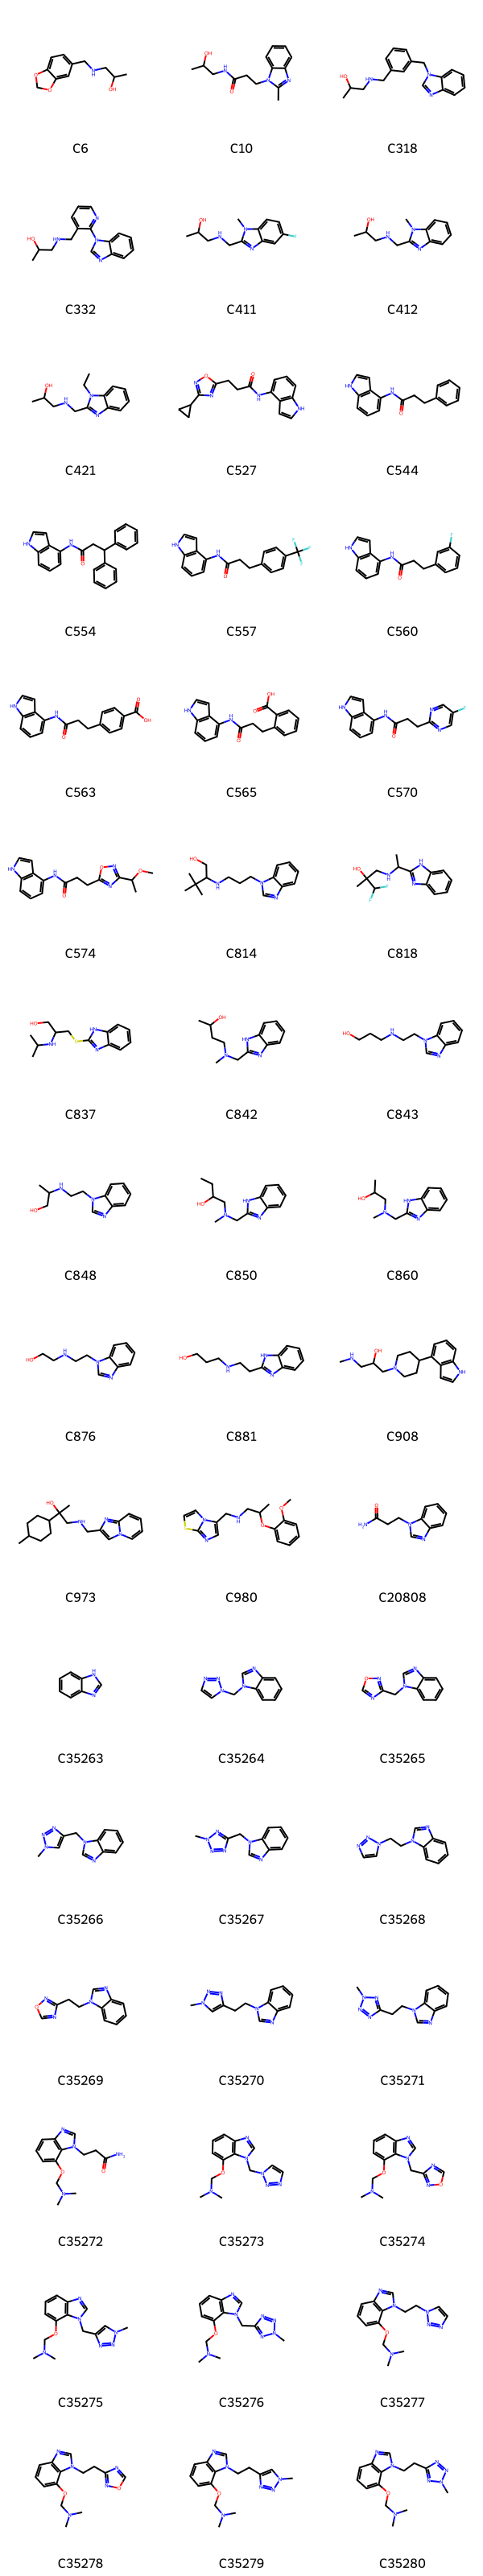

In [28]:
scaffolds = animal.compounds(tag="iter1 scaffold")
scaffolds.draw()

In [10]:
for c in scaffolds:
    elabs = c.elabs
    print(c, c.elabs)

    if elabs:
        c.add_tag("elaborated iter1 scaffold")

C318 "JUOHPSFGSZHWSU-UHFFFAOYSA-N" elaborations of C318: {C × 2128}

C332 "XVPJEXHCKXPYIT-UHFFFAOYSA-N" elaborations of C332: {C × 1795}

C411 "NWIXKFJBQIDTEM-UHFFFAOYSA-N" elaborations of C411: {C × 1317}

C412 "MVTGOQDBIJSKPE-UHFFFAOYSA-N" elaborations of C412: {C × 2310}

C421 "YFPGSEQYEDBGPH-UHFFFAOYSA-N" elaborations of C421: {C × 1851}

C554 "PMMASMGHJOEHPC-UHFFFAOYSA-N" elaborations of C554: {C × 4182}

C843 "MDJFAQNWAZYQKE-UHFFFAOYSA-N" elaborations of C843: {C × 2610}

C848 "SNLWHVVYKUWCMG-UHFFFAOYSA-N" elaborations of C848: {C × 2179}

C881 "HFYRFGURHQNLDS-UHFFFAOYSA-N" elaborations of C881: {C × 1206}

C973 "OYFZSXUCDDDLSQ-UHFFFAOYSA-N" elaborations of C973: {C × 637}

C980 "NWNDXWKRJDTNKY-UHFFFAOYSA-N" elaborations of C980: {C × 1693}

In [29]:
elaborated_scaffolds = animal.compounds(tag="elaborated iter1 scaffold")
unelaborated_scaffolds = scaffolds - elaborated_scaffolds
print(len(elaborated_scaffolds))

11

In [31]:
unelaborated_scaffolds.write_smiles_csv("unelaborated_iter1_scaffolds.csv")
unelaborated_scaffolds

 DISK  Writing unelaborated_iter1_scaffolds.csv...

{C × 37}

In [15]:
df = elaborated_scaffolds.elab_df
# df["scaffold_str"] = df["scaffold_id"].convert_dtypes(convert_string=True)
df

,scaffold_id,scaffold_compound,elabs,num_elabs
0,3034,C3034,"(C3035, C3036, C3037, C3038, C3039, C3040, C30...",96
1,7363,C7363,"(C7364, C7365, C7366, C7367, C7368, C7369, C73...",76
2,7440,C7440,"(C7441, C7442, C7443, C7444, C7445, C7449, C74...",75
3,881,C881,"(C7522, C7523, C7524, C7525, C7526, C7527, C75...",1206
4,8728,C8728,"(C8729, C8730, C8731, C8732, C8733, C8734, C87...",32
5,8761,C8761,"(C8762, C8763, C8764, C8765, C8766, C8767, C87...",64
6,973,C973,"(C8826, C8827, C8828, C8829, C8830, C8831, C88...",637
7,9427,C9427,"(C9428, C9429, C9430, C9431, C9432, C9433, C94...",30
8,9684,C9684,"(C6965, C9685, C9686, C9687, C9688, C9689, C96...",76
9,3134,C3134,"(C1108, C1115, C1123, C1141, C1142, C1143, C11...",62


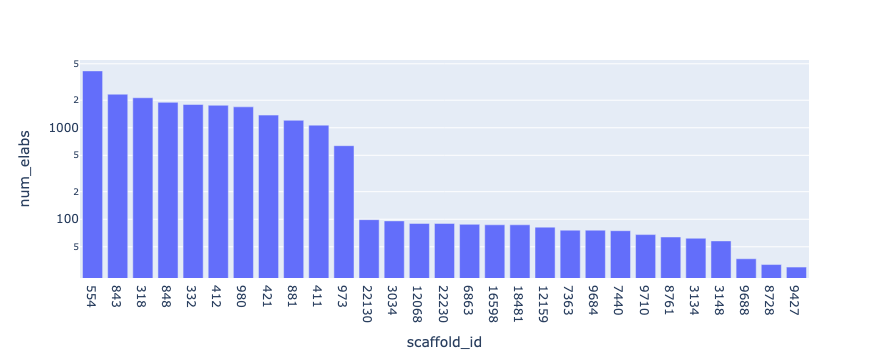

In [16]:
fig = px.bar(df, x="scaffold_id", y="num_elabs", log_y=True)
fig.update_xaxes(type="category")
fig.update_xaxes(categoryorder="total descending")
fig

In [17]:
scaffold_poses = elaborated_scaffolds.best_placed_poses
scaffold_poses.add_tag("best elaborated iter1 scaffold poses")
scaffold_poses.interactive()

Tagged {P × 11} w/ "best elaborated iter1 scaffold poses"

Output()

## Get quotes

In [22]:
catalogue = hippo.HIPPO("EnamineCatalogs", "/opt/xchem-fragalysis-2/maxwin/EnamineCatalogs/enamine_and_molport.sqlite")

 Creating HIPPO animal

name = EnamineCatalogs

db_path = /opt/xchem-fragalysis-2/maxwin/EnamineCatalogs/enamine_and_molport.sqlite

DEBUG: hippo.Database.__init__()

DEBUG: Database.path = /opt/xchem-fragalysis-2/maxwin/EnamineCatalogs/enamine_and_molport.sqlite

DEBUG: hippo.Database.connect()

DEBUG: sqlite3.version='2.6.0'

 Success  Database connected @ /opt/xchem-fragalysis-2/maxwin/EnamineCatalogs/enamine_and_molport.sqlite!

 Success  Initialised animal HIPPO("EnamineCatalogs")!

In [23]:
animal.quote_compounds(catalogue, animal.reactants, debug=False)

Output()

Output()

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCO

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)(C(=O)O)C([2H])([2H])[2H]

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: NC[13C](=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCCOC

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])NCC(=O)O

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])([2H])N([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])([2H])N([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])([2H])N([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[C]([2H])(N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[C]([2H])(N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[C]([2H])(N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])C(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[CH](N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[CH](N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])([2H])[CH](N)C(O)=O |r|

Warning: Isotope(s) in SMILES: [2H]C([2H])(Cl)C1([2H])OC1([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])(Cl)C1([2H])OC1([2H])[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])(O)C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])(O)C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])(O)C([2H])(N)C(O)=O

Warning: Isotope(s) in SMILES: N[13CH]([13CH2]O)[13C](O)=O |r|

Warning: Isotope(s) in SMILES: N[13CH]([13CH2]O)[13C](O)=O |r|

Warning: Isotope(s) in SMILES: [2H]OC(=O)[C]([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)[C]([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)[C]([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)[C]([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]OC(=O)C([2H])(N([2H])[2H])C([2H])([2H])O[2H]

Warning: Isotope(s) in SMILES: [2H]C([2H])(S)[C]([2H])([15NH2])C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])(S)[C]([2H])([15NH2])C(O)=O

Warning: Isotope(s) in SMILES: [2H]C([2H])(N)C([2H])([2H])C([2H])([2H])O

Warning: Isotope(s) in SMILES: [2H]C([2H])(N)C([2H])([2H])C([2H])([2H])O

#new quotes = 8268

#quoted_compounds = 340

#unquoted_compounds = 1683

({C × 340}, {C × 1683})

In [24]:
animal.db.backup()

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/BulkDock/TARGETS/A71EV2AZ/A71EV2AZ_0FWMVF9.sqlite...

Output()

DEBUG: Copied 10000 of 42114 pages...

DEBUG: Copied 20000 of 42114 pages...

DEBUG: Copied 30000 of 42114 pages...

DEBUG: Copied 40000 of 42114 pages...

DEBUG: Copied 42114 of 42114 pages...

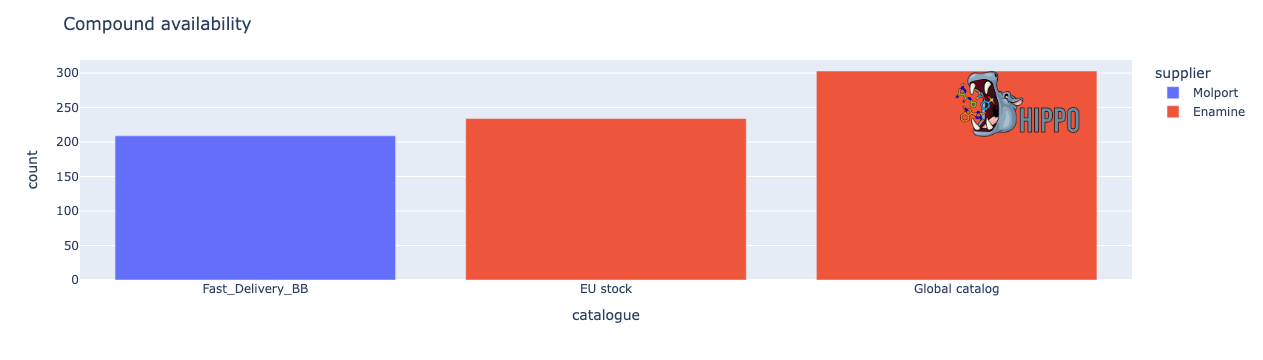

In [25]:
animal.plot_compound_availability(animal.reactants)

<Axes: >

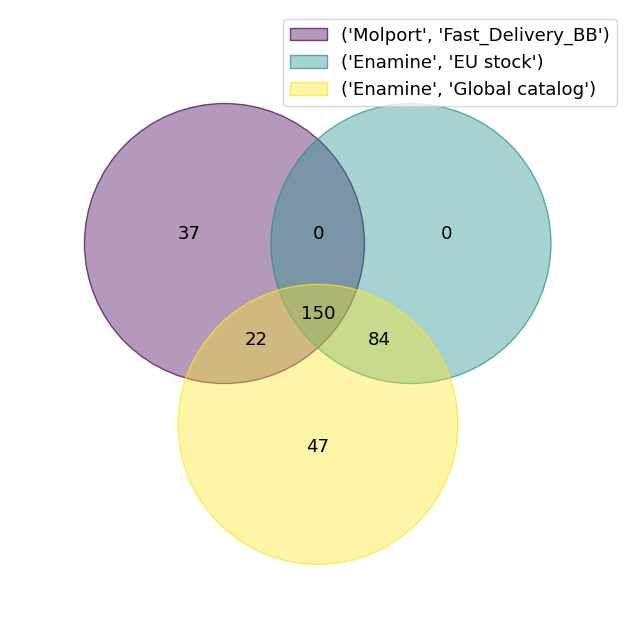

In [26]:
animal.plot_compound_availability_venn(animal.reactants)

## Unquoted scaffold recipe (for chem review)

In [22]:
elaborated_scaffolds

compounds tagged elaborated iter1 scaffold: {C × 22}

In [23]:
recipes = hippo.Recipe.from_compounds(elaborated_scaffolds, quoted_only=False, pick_cheapest=False, supplier="Enamine")

#compounds = 22

Output()

 Success  Found solution for compound=C2022!

 Success  Found solution for compound=C2134!

 ERROR  Reactants not available for reaction=R34000: C47757 + C49341 -> C2712 via 
Buchwald-Hartwig_amidation_with_amide-like_nucleophile!

 ERROR  No solutions for compound=C2712 (comp.reactions.ids=[34000])!

 Success  Found solution for compound=C2845!

 Success  Found solution for compound=C3233!

 Success  Found solution for compound=C3254!

 Success  Found solution for compound=C3264!

 Success  Found solution for compound=C3360!

 Success  Found solution for compound=C3996!

 ERROR  Reactants not available for reaction=R2921: C10853 + C10856 -> C4044 via 
Nucleophilic_substitution_with_amine!

 ERROR  No solutions for compound=C4044 (comp.reactions.ids=[2921])!

 Success  Found solution for compound=C5315!

 Success  Found solution for compound=C5316!

 Success  Found solution for compound=C5327!

 Success  Found solution for compound=C5856!

 Success  Found solution for compound=C5868!

 Success  Found solution for compound=C5906!

 ERROR  Reactants not available for reaction=R12417: C7339 + C22689 -> C5911 via Ester_amidation!

 ERROR  Reactants not available for reaction=R14035: C7339 + C25693 -> C5911 via Amidation!

 ERROR  No solutions for compound=C5911 (comp.reactions.ids=[12417, 14035])!

 Success  Found solution for compound=C7035!

 Success  Found solution for compound=C7036!

 Success  Found solution for compound=C7068!

 Success  Found solution for compound=C7190!

 Success  Found solution for compound=C7248!

Solving recipe combinations...

Output()

In [41]:
recipes

[Recipe({Ingredient × 65} --> {Ingredient × 42} via {R × 42})]

In [24]:
recipes[0].write_json("iter1_scaffolds_Recipe.json")

 DISK  Writing iter1_scaffolds_Recipe.json...

In [25]:
recipes[0].write_CAR_csv("iter1_scaffolds_CAR.csv")

DEBUG: Querying database for routes

DEBUG: Assembling route dictionary

DEBUG: Checking availability

Output()

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/3C_FFF/hippo/iter1_scaffolds_CAR_1steps.csv...

 DISK  Writing /opt/xchem-fragalysis-2/maxwin/3C_FFF/hippo/iter1_scaffolds_CAR.csv...

,target-names,no-steps,concentration-required-mM,amount-required-uL,batch-tag,reactant-1-1,reactant-2-1,reaction-product-smiles-1,reaction-name-1,reaction-recipe-1,reaction-groupby-column-1
0,C2022,1,None,None,None,COc1cc(C=O)cc2c1OCO2,CC(N)Cc1ccno1,COc1cc(CNC(C)Cc2ccno2)cc2c1OCO2,Reductive_amination,None,None
1,C2134,1,None,None,None,c1cc2c(cc1COCC1CO1)OCO2,NCc1ccon1,OC(CNCc1ccon1)COCc1ccc2c(c1)OCO2,Epoxide_+_amine_coupling,None,None
2,C2845,1,None,None,None,O=C(O)C1CCN(c2cc(=O)[nH]cn2)CC1,NCCc1ccno1,O=C(NCCc1ccno1)C1CCN(c2cc(=O)[nH]cn2)CC1,Amidation,None,None
3,C3233,1,None,None,None,O=C(O)c1cc(CN2CCCCC2)on1,CS(=O)(=O)CCCCCN,CS(=O)(=O)CCCCCNC(=O)c1cc(CN2CCCCC2)on1,Amidation,None,None
4,C3254,1,None,None,None,O=C(O)c1cc(CN2CCCCC2)on1,COCCN(C)CCCN,COCCN(C)CCCNC(=O)c1cc(CN2CCCCC2)on1,Amidation,None,None
5,C3264,1,None,None,None,O=C(O)c1cc(CN2CCCCC2)on1,NCCOC(F)F,O=C(NCCOC(F)F)c1cc(CN2CCCCC2)on1,Amidation,None,None
6,C3360,1,None,None,None,OCc1cc(C2CCNCC2)no1,c1nc2n(n1)CCNC2,c1nc2n(n1)CCN(Cc1cc(C3CCNCC3)no1)C2,Mitsunobu_reaction_with_amine_alcohol_and_thio...,None,None
7,C3996,1,None,None,None,O=C(O)CCc1ccc2c(c1)OCCO2,OCCSCc1ccno1,O=C(CCc1ccc2c(c1)OCCO2)OCCSCc1ccno1,Steglich_esterification,None,None
8,C5315,1,None,None,None,O=C(O)c1cc(C2CNC2)no1,COC(CN)C1CCC1,COC(CNC(=O)c1cc(C2CNC2)no1)C1CCC1,Amidation,None,None
9,C5316,1,None,None,None,O=C(O)c1cc(C2CNC2)no1,COCC(N)c1nnn[nH]1,COCC(NC(=O)c1cc(C2CNC2)no1)c1nnn[nH]1,Amidation,None,None


## Unelaborated scaffold Recipe

In [26]:
recipes2 = hippo.Recipe.from_compounds(unelaborated_scaffolds, quoted_only=False, pick_cheapest=False, pick_first=True)

#compounds = 77

Output()

 ERROR  No solutions for compound=C117 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C157 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C170 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C172 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C174 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C178 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C180 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C182 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C257 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C321 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C407 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C469 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C472 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C475 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C477 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C479 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C481 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C485 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C487 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C488 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C491 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C492 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C493 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C494 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C495 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C497 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C498 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C499 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C500 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C501 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C707 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C759 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C824 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C839 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C841 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C898 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C900 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C933 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C962 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1033 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1043 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1097 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1098 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1100 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1101 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1121 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1122 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1125 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1280 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1708 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1770 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C1811 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C2074 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C2096 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C2138 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C2702 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C2742 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3182 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3183 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3209 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3251 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3324 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3495 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3992 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C3994 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C4029 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C4445 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C5312 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C5314 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C5867 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C6162 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C6421 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C6717 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C6727 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C7247 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C7272 (comp.reactions.ids=[])!

 ERROR  No solutions for compound=C7273 (comp.reactions.ids=[])!

Solving recipe combinations...

Output()

 ERROR  No solutions!

In [27]:
recipes2.write_json("iter1_unelaborated_scaffolds_Recipe.json")

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:1                                                                                    │
│                                                                                                  │
│ ❱ 1 recipes2.write_json("iter1_unelaborated_scaffolds_Recipe.json")                              │
│   2                                                                                              │
│                                                                                                  │
│ ╭─────────────────────────────────────────── locals ───────────────────────────────────────────╮ │
│ │                 animal = HIPPO("3C_FFF")                                                     │ │
│ │                      c = C7273 "v34-MW-mod"                                                  │ │
│ │              catalogue = HIPPO("EnamineCatalogs")                                            │ │
│ │                     df = │   scaffold_id scaffold_compound  \                                │ │
│ │                          0          7274             C7274                                   │ │
│ │                          1          7339             C7339                                   │ │
│ │                          2          5856             C5856                                   │ │
│ │                          3         10853            C10853                                   │ │
│ │                          4         10856            C10856                                   │ │
│ │                          5          4044             C4044                                   │ │
│ │                          6         13126            C13126                                   │ │
│ │                          7         13159            C13159                                   │ │
│ │                          8          3254             C3254                                   │ │
│ │                          9         14991            C14991                                   │ │
│ │                          10        15074            C15074                                   │ │
│ │                          11         5868             C5868                                   │ │
│ │                          12        16650            C16650                                   │ │
│ │                          13        16700            C16700                                   │ │
│ │                          14         7190             C7190                                   │ │
│ │                          15        18027            C18027                                   │ │
│ │                          16        18083            C18083                                   │ │
│ │                          17         2022             C2022                                   │ │
│ │                          18        21385            C21385                                   │ │
│ │                          19        21471            C21471                                   │ │
│ │                          20         2845             C2845                                   │ │
│ │                          21        22689            C22689                                   │ │
│ │                          22         5911             C5911                                   │ │
│ │                          23        25693            C25693                                   │ │
│ │                          24        28670            C28670                                   │ │
│ │                          25         3233             C3233                                   │ │
│ │                          26        29789            C29789                                   │ │
│ │                          27         3264             C3264                                   │ │
│ │                          28        31795            C3179

In [ ]:
recipes2.write_CAR_csv("iter1_unelaborated_scaffolds_CAR.csv")

In [ ]:
unaccessible_scaffolds = set()
for c in mrich.track(unelaborated_scaffolds):
    if not c.reactions:
        unaccessible_scaffolds.add(c.id)
unaccessible_scaffolds = animal.compounds[unaccessible_scaffolds]
unaccessible_scaffolds.write_smiles_csv("unaccessible_iter1_scaffolds.csv")